<a href="https://colab.research.google.com/github/LiFeLeSS5858/ABD/blob/main/DZ1_RAD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/ABD/Zadanie1/France_weather_data.csv")
df

,utc_timestamp,temperature,radiation_direct_horizontal,radiation_diffuse_horizontal
0,2016-01-01T00:00:00Z,5.571,0.0,0.0
1,2016-01-01T01:00:00Z,5.415,0.0,0.0
2,2016-01-01T02:00:00Z,5.288,0.0,0.0
3,2016-01-01T03:00:00Z,5.177,0.0,0.0
4,2016-01-01T04:00:00Z,5.131,0.0,0.0
...,...,...,...,...
35059,2019-12-31T19:00:00Z,2.048,0.0,0.0
35060,2019-12-31T20:00:00Z,1.995,0.0,0.0
35061,2019-12-31T21:00:00Z,2.107,0.0,0.0
35062,2019-12-31T22:00:00Z,2.280,0.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   utc_timestamp                 35064 non-null  object 
 1   temperature                   35064 non-null  float64
 2   radiation_direct_horizontal   35064 non-null  float64
 3   radiation_diffuse_horizontal  35064 non-null  float64
dtypes: float64(3), object(1)
memory usage: 1.1+ MB


Преобразуем признак "utc_timestamp" в тип данных datetime

In [ ]:
df['utc_timestamp'] = pd.to_datetime(df['utc_timestamp'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype              
---  ------                        --------------  -----              
 0   utc_timestamp                 35064 non-null  datetime64[ns, UTC]
 1   temperature                   35064 non-null  float64            
 2   radiation_direct_horizontal   35064 non-null  float64            
 3   radiation_diffuse_horizontal  35064 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(3)
memory usage: 1.1 MB


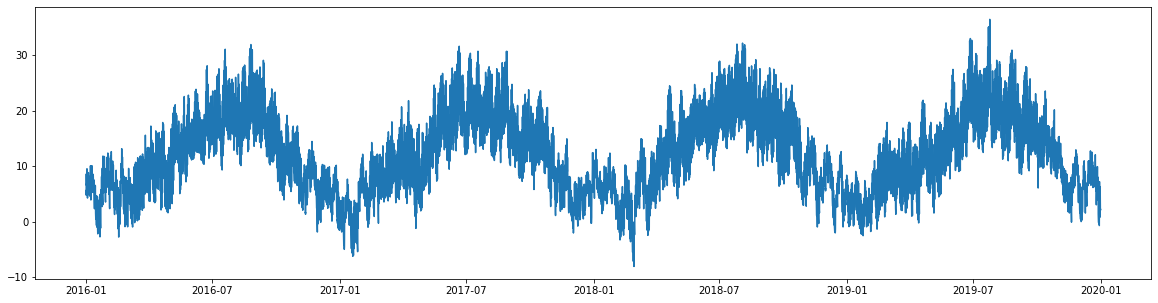

In [ ]:
# 9 min
x = df['utc_timestamp']
y = df['temperature']

plt.figure(figsize=(20,5))
plt.plot(x,y)

In [ ]:
df.describe()

,temperature,radiation_direct_horizontal,radiation_diffuse_horizontal
count,35064.000000,35064.000000,35064.000000
mean,11.765980,96.463088,69.280033
std,7.352578,175.675814,89.888464
min,-8.106000,0.000000,0.000000
25%,6.044000,0.000000,0.000000
50%,11.116500,0.731300,8.353950
75%,17.125000,106.231550,126.970250
max,36.465000,871.955600,398.571300


## Меры нормальности

In [ ]:
from scipy.stats import skew, skewtest
from scipy.stats import kurtosis, kurtosistest

In [ ]:
s = skew(df['temperature'])
zscore, pvalue = skewtest(df['temperature'])
print(f'skewness = {s}, z-score = {zscore}, p-value = {pvalue}')

skewness = 0.28104099941169347, z-score = 21.086137932087397, p-value = 1.0661871608399968e-98


In [ ]:
k = kurtosis(df['temperature'])
zscore, pvalue = kurtosistest(df['temperature'])
print(f'kurtosis = {k}, z-score = {zscore}, p-value = {pvalue}')

kurtosis = -0.5779391737970387, z-score = -31.860647701006332, p-value = 9.37357047932954e-223


array([[<Axes: xlabel='temperature', ylabel='temperature'>,
        <Axes: xlabel='radiation_direct_horizontal', ylabel='temperature'>,
        <Axes: xlabel='radiation_diffuse_horizontal', ylabel='temperature'>],
       [<Axes: xlabel='temperature', ylabel='radiation_direct_horizontal'>,
        <Axes: xlabel='radiation_direct_horizontal', ylabel='radiation_direct_horizontal'>,
        <Axes: xlabel='radiation_diffuse_horizontal', ylabel='radiation_direct_horizontal'>],
       [<Axes: xlabel='temperature', ylabel='radiation_diffuse_horizontal'>,
        <Axes: xlabel='radiation_direct_horizontal', ylabel='radiation_diffuse_horizontal'>,
        <Axes: xlabel='radiation_diffuse_horizontal', ylabel='radiation_diffuse_horizontal'>]],
      dtype=object)

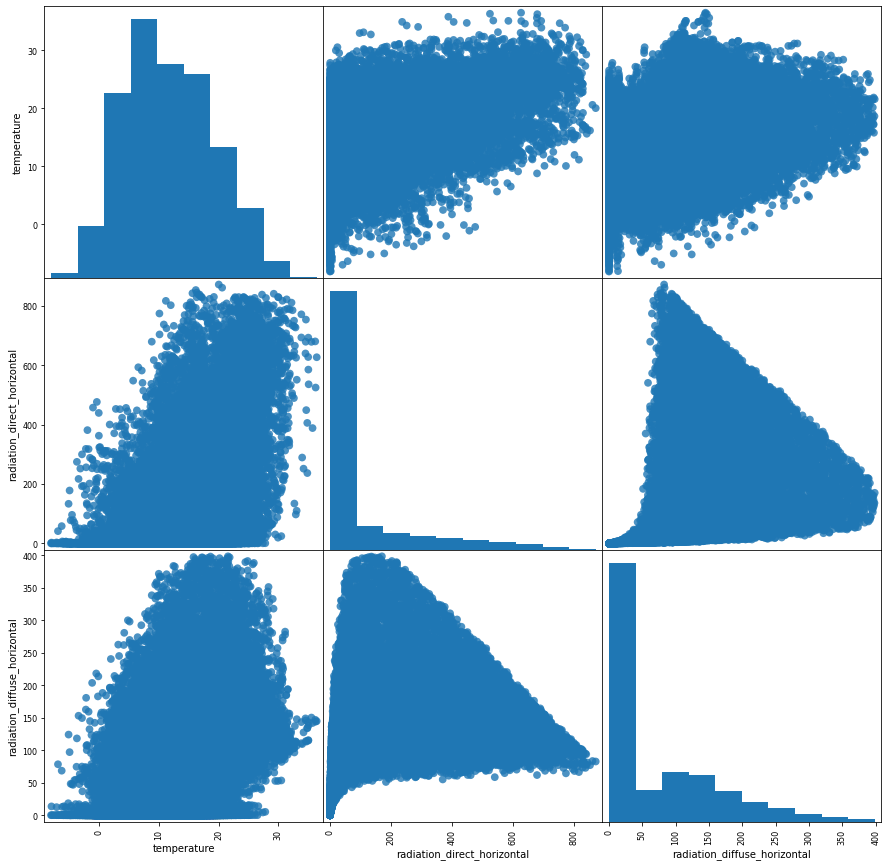

In [ ]:
pd.plotting.scatter_matrix(df, figsize=(15,15), marker = 'o', s = 60, alpha = 0.8)

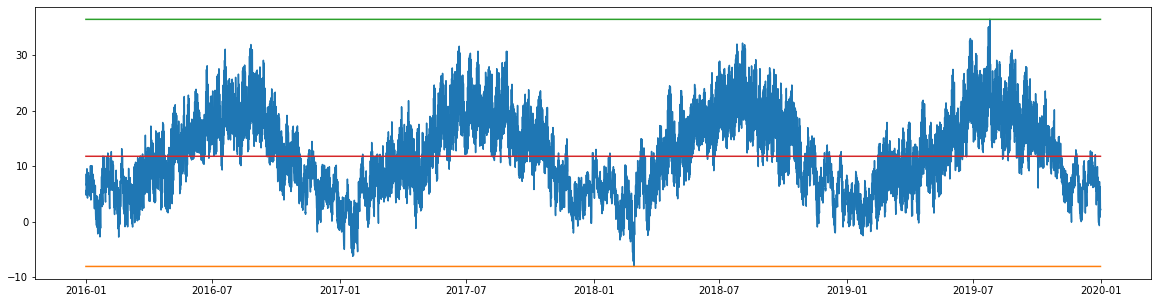

In [ ]:
#9 min
df["t_min"] = df['temperature'].min()
df["t_max"] = df['temperature'].max()
df["t_mean"] = df['temperature'].mean()

x = df['utc_timestamp']
y = df['temperature']

plt.figure(figsize=(20,5))
plt.plot(x, df['temperature'])
plt.plot(x, df["t_min"])
plt.plot(x, df["t_max"])
plt.plot(x, df["t_mean"])

<Axes: >

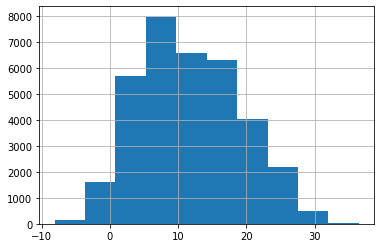

In [ ]:
df['temperature'].hist()

<Figure size 800x800 with 0 Axes>

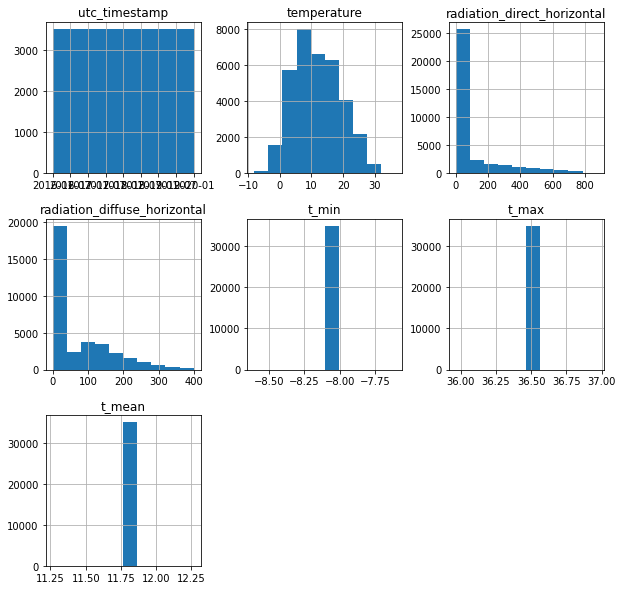

In [ ]:
fig = plt.figure(figsize=(4, 4), dpi=200)
df.hist(figsize=(10,10))
plt.show()

## Квантили
"99%-ый квантиль равен 28 градусам", если в 99% случаев температура не превышала 28 градусов

In [ ]:
df['temperature'].quantile(0.99)

28.466810000000034

In [ ]:
df['temperature'].quantile(0.01)

-2.02981

In [ ]:
df['radiation_direct_horizontal'].quantile(0.99)

712.4612750000003

In [ ]:
df['radiation_direct_horizontal'].quantile(0.01)

0.0

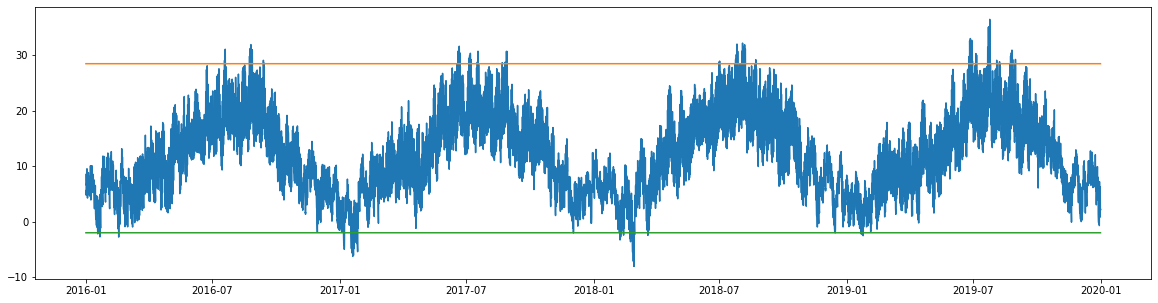

In [ ]:
df['temperature_quantile_99'] = df['temperature'].quantile(0.99)
df['temperature_quantile_01'] = df['temperature'].quantile(0.01)

x = df['utc_timestamp']

plt.figure(figsize=(20,5))
plt.plot(x, df['temperature'])
plt.plot(x, df['temperature_quantile_99'])
plt.plot(x, df['temperature_quantile_01'])

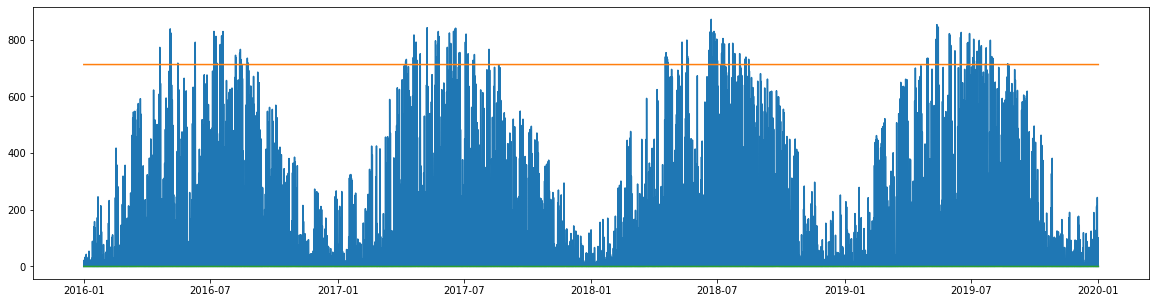

In [ ]:
df['radiation_direct_horizontal_99'] = df['radiation_direct_horizontal'].quantile(0.99)
df['radiation_direct_horizontal_01'] = df['radiation_direct_horizontal'].quantile(0.01)

x = df['utc_timestamp']

plt.figure(figsize=(20,5))
plt.plot(x, df['radiation_direct_horizontal'])
plt.plot(x, df['radiation_direct_horizontal_99'])
plt.plot(x, df['radiation_direct_horizontal_01'])

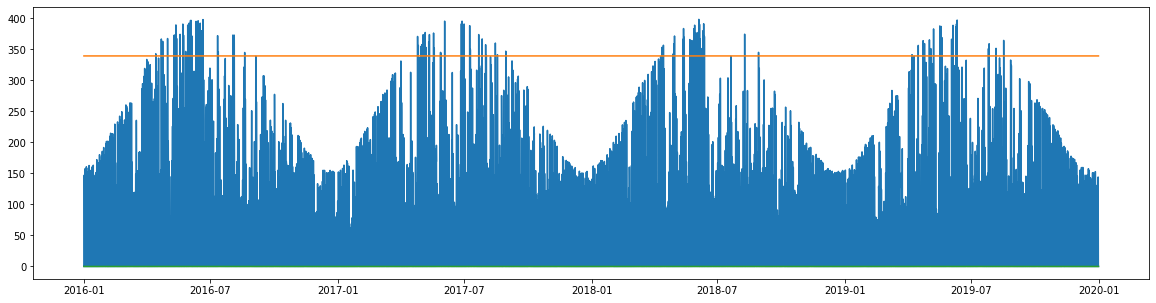

In [ ]:
df['radiation_diffuse_horizontal_99'] = df['radiation_diffuse_horizontal'].quantile(0.99)
df['radiation_diffuse_horizontal_01'] = df['radiation_diffuse_horizontal'].quantile(0.01)

x = df['utc_timestamp']

plt.figure(figsize=(20,5))
plt.plot(x, df['radiation_diffuse_horizontal'])
plt.plot(x, df['radiation_diffuse_horizontal_99'])
plt.plot(x, df['radiation_diffuse_horizontal_01'])

## Измерение центральной тенденции

In [ ]:
df.mean(numeric_only=True)

temperature                         11.765980
radiation_direct_horizontal         96.463088
radiation_diffuse_horizontal        69.280033
t_min                               -8.106000
t_max                               36.465000
t_mean                              11.765980
temperature_quantile_99             28.466810
temperature_quantile_01             -2.029810
radiation_direct_horizontal_99     712.461275
radiation_direct_horizontal_01       0.000000
radiation_diffuse_horizontal_99    339.574161
radiation_diffuse_horizontal_01      0.000000
dtype: float64

In [ ]:
df.median(numeric_only=True)

temperature                         11.116500
radiation_direct_horizontal          0.731300
radiation_diffuse_horizontal         8.353950
t_min                               -8.106000
t_max                               36.465000
t_mean                              11.765980
temperature_quantile_99             28.466810
temperature_quantile_01             -2.029810
radiation_direct_horizontal_99     712.461275
radiation_direct_horizontal_01       0.000000
radiation_diffuse_horizontal_99    339.574161
radiation_diffuse_horizontal_01      0.000000
dtype: float64

* Медиана сильно отличается от среднего значения

## Измерение дисперсии и диапазона

In [ ]:
df.std()

utc_timestamp                      421 days 18:14:57.321494624
temperature                                           7.352578
radiation_direct_horizontal                         175.675814
radiation_diffuse_horizontal                         89.888464
t_min                                                      0.0
t_max                                                      0.0
t_mean                                                     0.0
temperature_quantile_99                                    0.0
temperature_quantile_01                                    0.0
radiation_direct_horizontal_99                             0.0
radiation_direct_horizontal_01                             0.0
radiation_diffuse_horizontal_99                            0.0
radiation_diffuse_horizontal_01                            0.0
dtype: object

In [ ]:
df.max(numeric_only=True) - df.min(numeric_only=True)

temperature                         44.5710
radiation_direct_horizontal        871.9556
radiation_diffuse_horizontal       398.5713
t_min                                0.0000
t_max                                0.0000
t_mean                               0.0000
temperature_quantile_99              0.0000
temperature_quantile_01              0.0000
radiation_direct_horizontal_99       0.0000
radiation_direct_horizontal_01       0.0000
radiation_diffuse_horizontal_99      0.0000
radiation_diffuse_horizontal_01      0.0000
dtype: float64

## Диаграммы размаха (boxplot)

<Axes: >

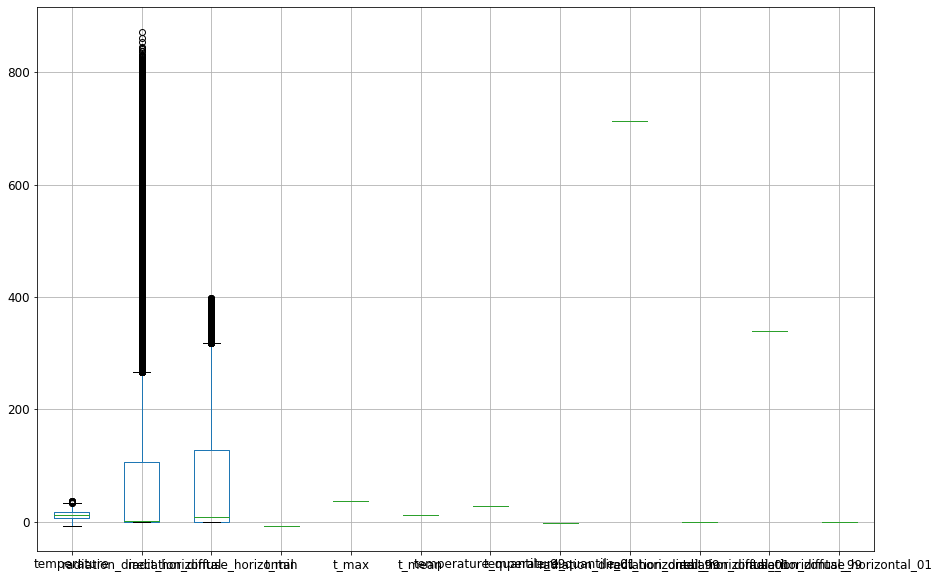

In [ ]:
df.boxplot(fontsize=12, figsize=(15, 10))

* В данных присутствуют аномальные значения

## Выбросы

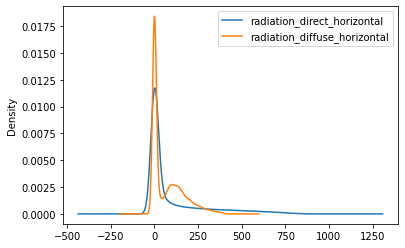

In [ ]:
columns = df.columns[2:4]
density_plot = df[columns].plot(kind='density')

## Коррелляция параметров
___Коррелляция___ - это величина, которая показывает, насколько похоже 2 ряда себя ведут: убывают и возрастают они одновременно (=1) или в противофазе (=-1)  
![](https://drive.google.com/uc?export=view&id=1VCjC2CcqUSmj3GFn8ibybdJ0cOPT6nfS)
![](https://drive.google.com/uc?export=view&id=1QehF56M3d58DAKz7FdHRNhmxLobG-lte)

In [ ]:
round(df[["temperature", "radiation_direct_horizontal", "radiation_diffuse_horizontal"]].corr(), 3)

,temperature,radiation_direct_horizontal,radiation_diffuse_horizontal
temperature,1.000,0.561,0.453
radiation_direct_horizontal,0.561,1.000,0.541
radiation_diffuse_horizontal,0.453,0.541,1.000


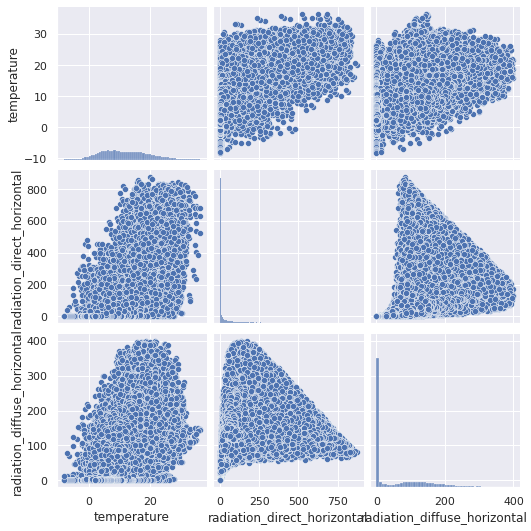

In [ ]:
import seaborn as sns; sns.set()

sns.pairplot(df[["temperature", "radiation_direct_horizontal", "radiation_diffuse_horizontal"]])

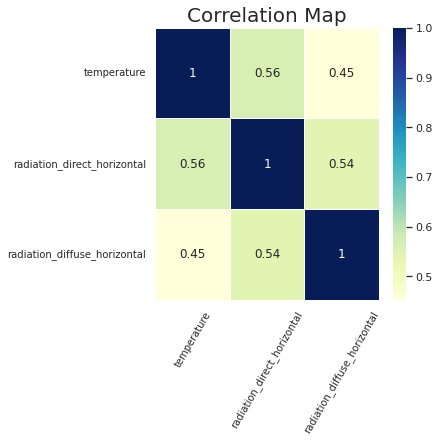

In [ ]:
def correlated_map(dataframe, plot=False):
    corr = dataframe.corr()
    if plot:
        sns.set(rc={'figure.figsize': (5, 5)})
        sns.heatmap(corr, cmap="YlGnBu", annot=True, linewidths=.7)
        plt.xticks(rotation=60, size=10)
        plt.yticks(size=10)
        plt.title('Correlation Map', size=20)
        plt.show()

correlated_map(df[["temperature", "radiation_direct_horizontal", "radiation_diffuse_horizontal"]], plot=True)

## Автокоррелляция, сезонность
___Автокоррелляция___ - это величина, которая показывает, насколько ряд X скорреллирован с собой, но сдвинутым на некоторый интервал ```X+t``` (такой интервал называется *лагом*)

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

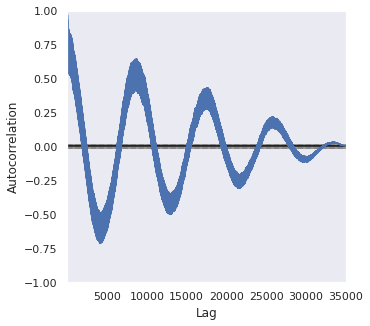

In [ ]:
pd.plotting.autocorrelation_plot(df["temperature"])

Почему сезонность с таким большим лагом (более 5000), если температура повторяется каждый год?  
Потому что замеры сделаны каждый час

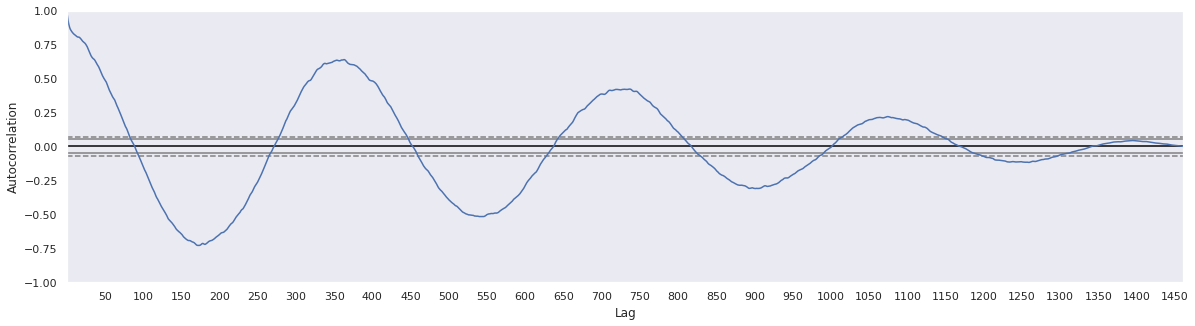

In [ ]:
# оставим по 1 замеру в день - в полдень
df_daily = df[df['utc_timestamp'].dt.hour == 12]  # выбираем записи, сделанные только в 12 часов дня

plt.figure(figsize=(20,5))
pd.plotting.autocorrelation_plot(df_daily["temperature"])
plt.locator_params(axis='x', nbins=50)

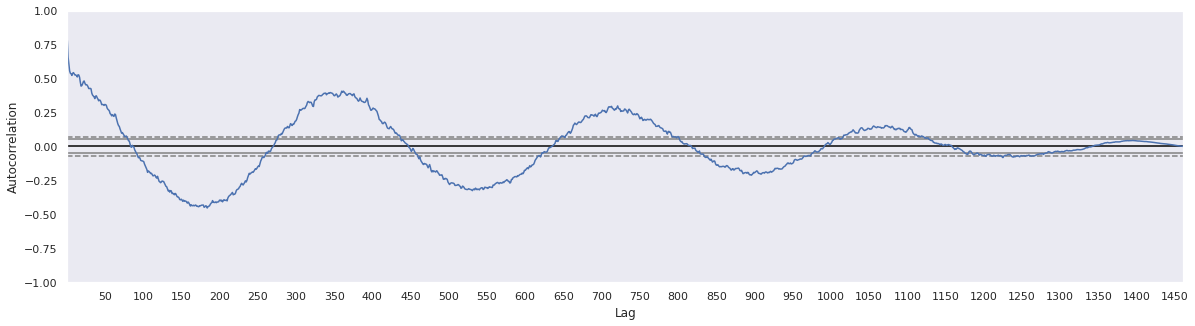

In [ ]:
# оставим по 1 замеру в день - в полдень
df_daily = df[df['utc_timestamp'].dt.hour == 12]  # выбираем записи, сделанные только в 12 часов дня

plt.figure(figsize=(20,5))
pd.plotting.autocorrelation_plot(df_daily["radiation_direct_horizontal"])
plt.locator_params(axis='x', nbins=50)

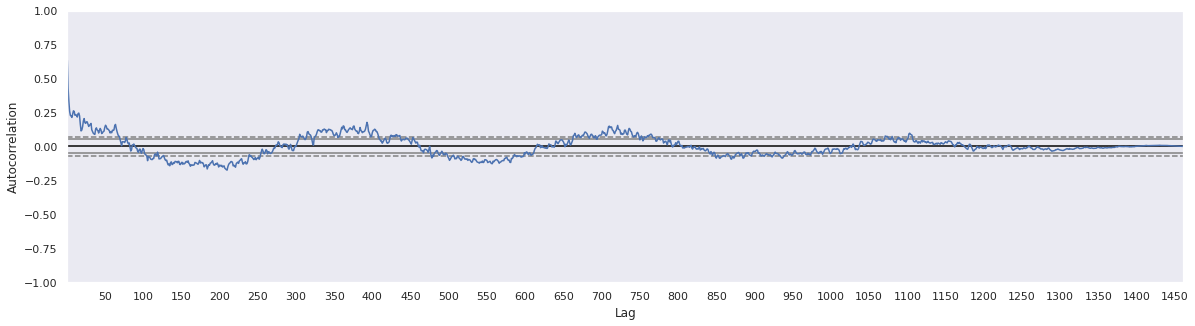

In [ ]:
# оставим по 1 замеру в день - в полдень
df_daily = df[df['utc_timestamp'].dt.hour == 12]  # выбираем записи, сделанные только в 12 часов дня

plt.figure(figsize=(20,5))
pd.plotting.autocorrelation_plot(df_daily["radiation_diffuse_horizontal"])
plt.locator_params(axis='x', nbins=50)

## Нормализация признаков

In [ ]:
from sklearn.preprocessing import QuantileTransformer

qt = QuantileTransformer()
qt.fit(df.iloc[:, 1:])

QuantileTransformer()

In [ ]:
df_scaled = qt.transform(df.iloc[:, 1:])
df_scaled

array([[0.22526941, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.21831526, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.21168467, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.08234757, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.08796561, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.08596739, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
df_scaled2 = pd.DataFrame(df_scaled, columns=df.columns[1:])
df_scaled2

,temperature,radiation_direct_horizontal,radiation_diffuse_horizontal,t_min,t_max,t_mean,temperature_quantile_99,temperature_quantile_01,radiation_direct_horizontal_99,radiation_direct_horizontal_01,radiation_diffuse_horizontal_99,radiation_diffuse_horizontal_01
0,0.225269,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.218315,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.211685,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.207015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.205247,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
35059,0.080361,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35060,0.078732,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35061,0.082348,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35062,0.087966,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


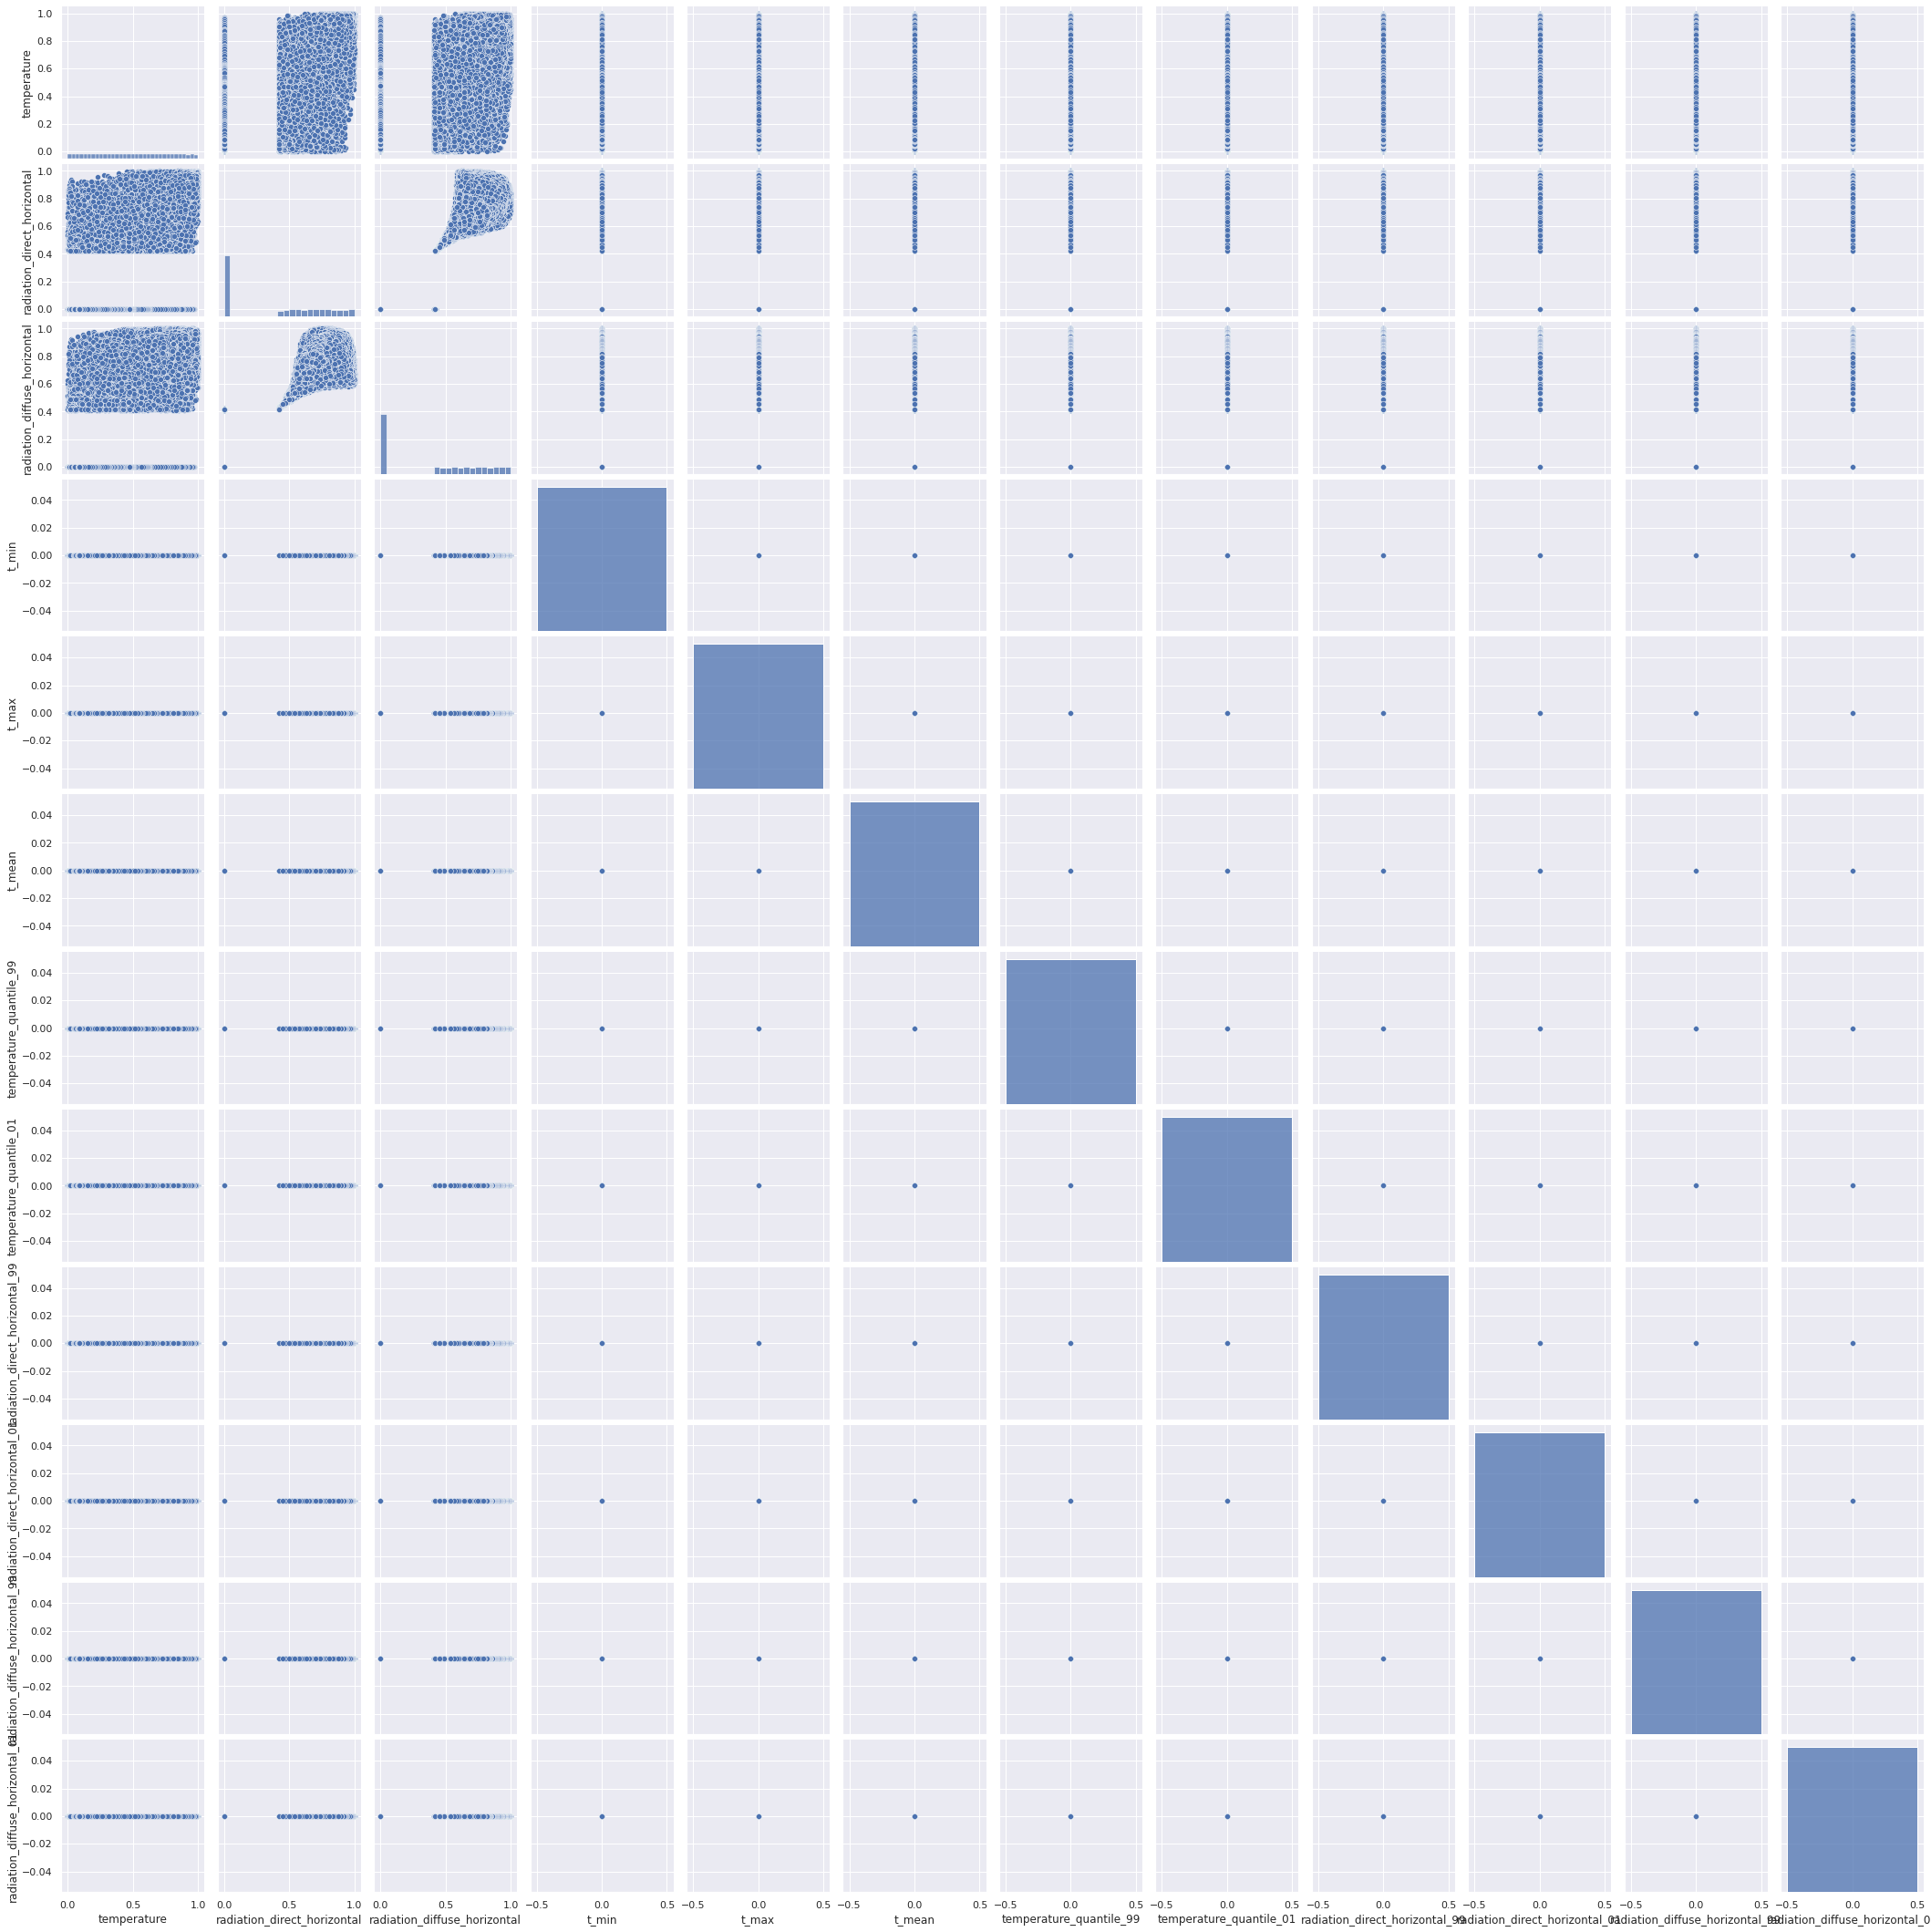

In [ ]:
import seaborn as sns
sns.pairplot(df_scaled2)

<Axes: >

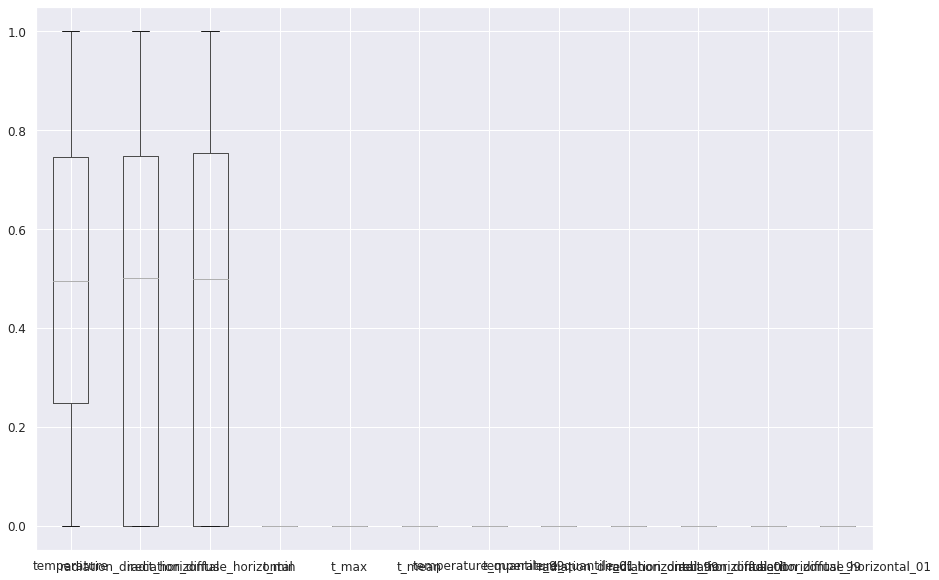

In [ ]:
df_scaled2.boxplot(fontsize=12, figsize=(15, 10))

In [ ]:
from sklearn.preprocessing import Normalizer

nrm = Normalizer()
nrm.fit(df.iloc[:, 1:])

Normalizer()

In [ ]:
df_scaled = nrm.transform(df.iloc[:, 1:])
df_scaled

array([[0.00704518, 0.        , 0.        , ..., 0.        , 0.42943114,
        0.        ],
       [0.00684791, 0.        , 0.        , ..., 0.        , 0.42943173,
        0.        ],
       [0.00668731, 0.        , 0.        , ..., 0.        , 0.4294322 ,
        0.        ],
       ...,
       [0.0026646 , 0.        , 0.        , ..., 0.        , 0.42944027,
        0.        ],
       [0.00288339, 0.        , 0.        , ..., 0.        , 0.42944001,
        0.        ],
       [0.00281257, 0.        , 0.        , ..., 0.        , 0.4294401 ,
        0.        ]])

In [ ]:
df_scaled2 = pd.DataFrame(df_scaled, columns=df.columns[1:])
df_scaled2

,temperature,radiation_direct_horizontal,radiation_diffuse_horizontal,t_min,t_max,t_mean,temperature_quantile_99,temperature_quantile_01,radiation_direct_horizontal_99,radiation_direct_horizontal_01,radiation_diffuse_horizontal_99,radiation_diffuse_horizontal_01
0,0.007045,0.0,0.0,-0.010251,0.046114,0.014879,0.036,-0.002567,0.900990,0.0,0.429431,0.0
1,0.006848,0.0,0.0,-0.010251,0.046114,0.014879,0.036,-0.002567,0.900992,0.0,0.429432,0.0
2,0.006687,0.0,0.0,-0.010251,0.046114,0.014879,0.036,-0.002567,0.900993,0.0,0.429432,0.0
3,0.006547,0.0,0.0,-0.010251,0.046114,0.014880,0.036,-0.002567,0.900993,0.0,0.429433,0.0
4,0.006489,0.0,0.0,-0.010251,0.046114,0.014880,0.036,-0.002567,0.900994,0.0,0.429433,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
35059,0.002590,0.0,0.0,-0.010251,0.046115,0.014880,0.036,-0.002567,0.901010,0.0,0.429440,0.0
35060,0.002523,0.0,0.0,-0.010251,0.046115,0.014880,0.036,-0.002567,0.901010,0.0,0.429440,0.0
35061,0.002665,0.0,0.0,-0.010251,0.046115,0.014880,0.036,-0.002567,0.901010,0.0,0.429440,0.0
35062,0.002883,0.0,0.0,-0.010251,0.046115,0.014880,0.036,-0.002567,0.901009,0.0,0.429440,0.0


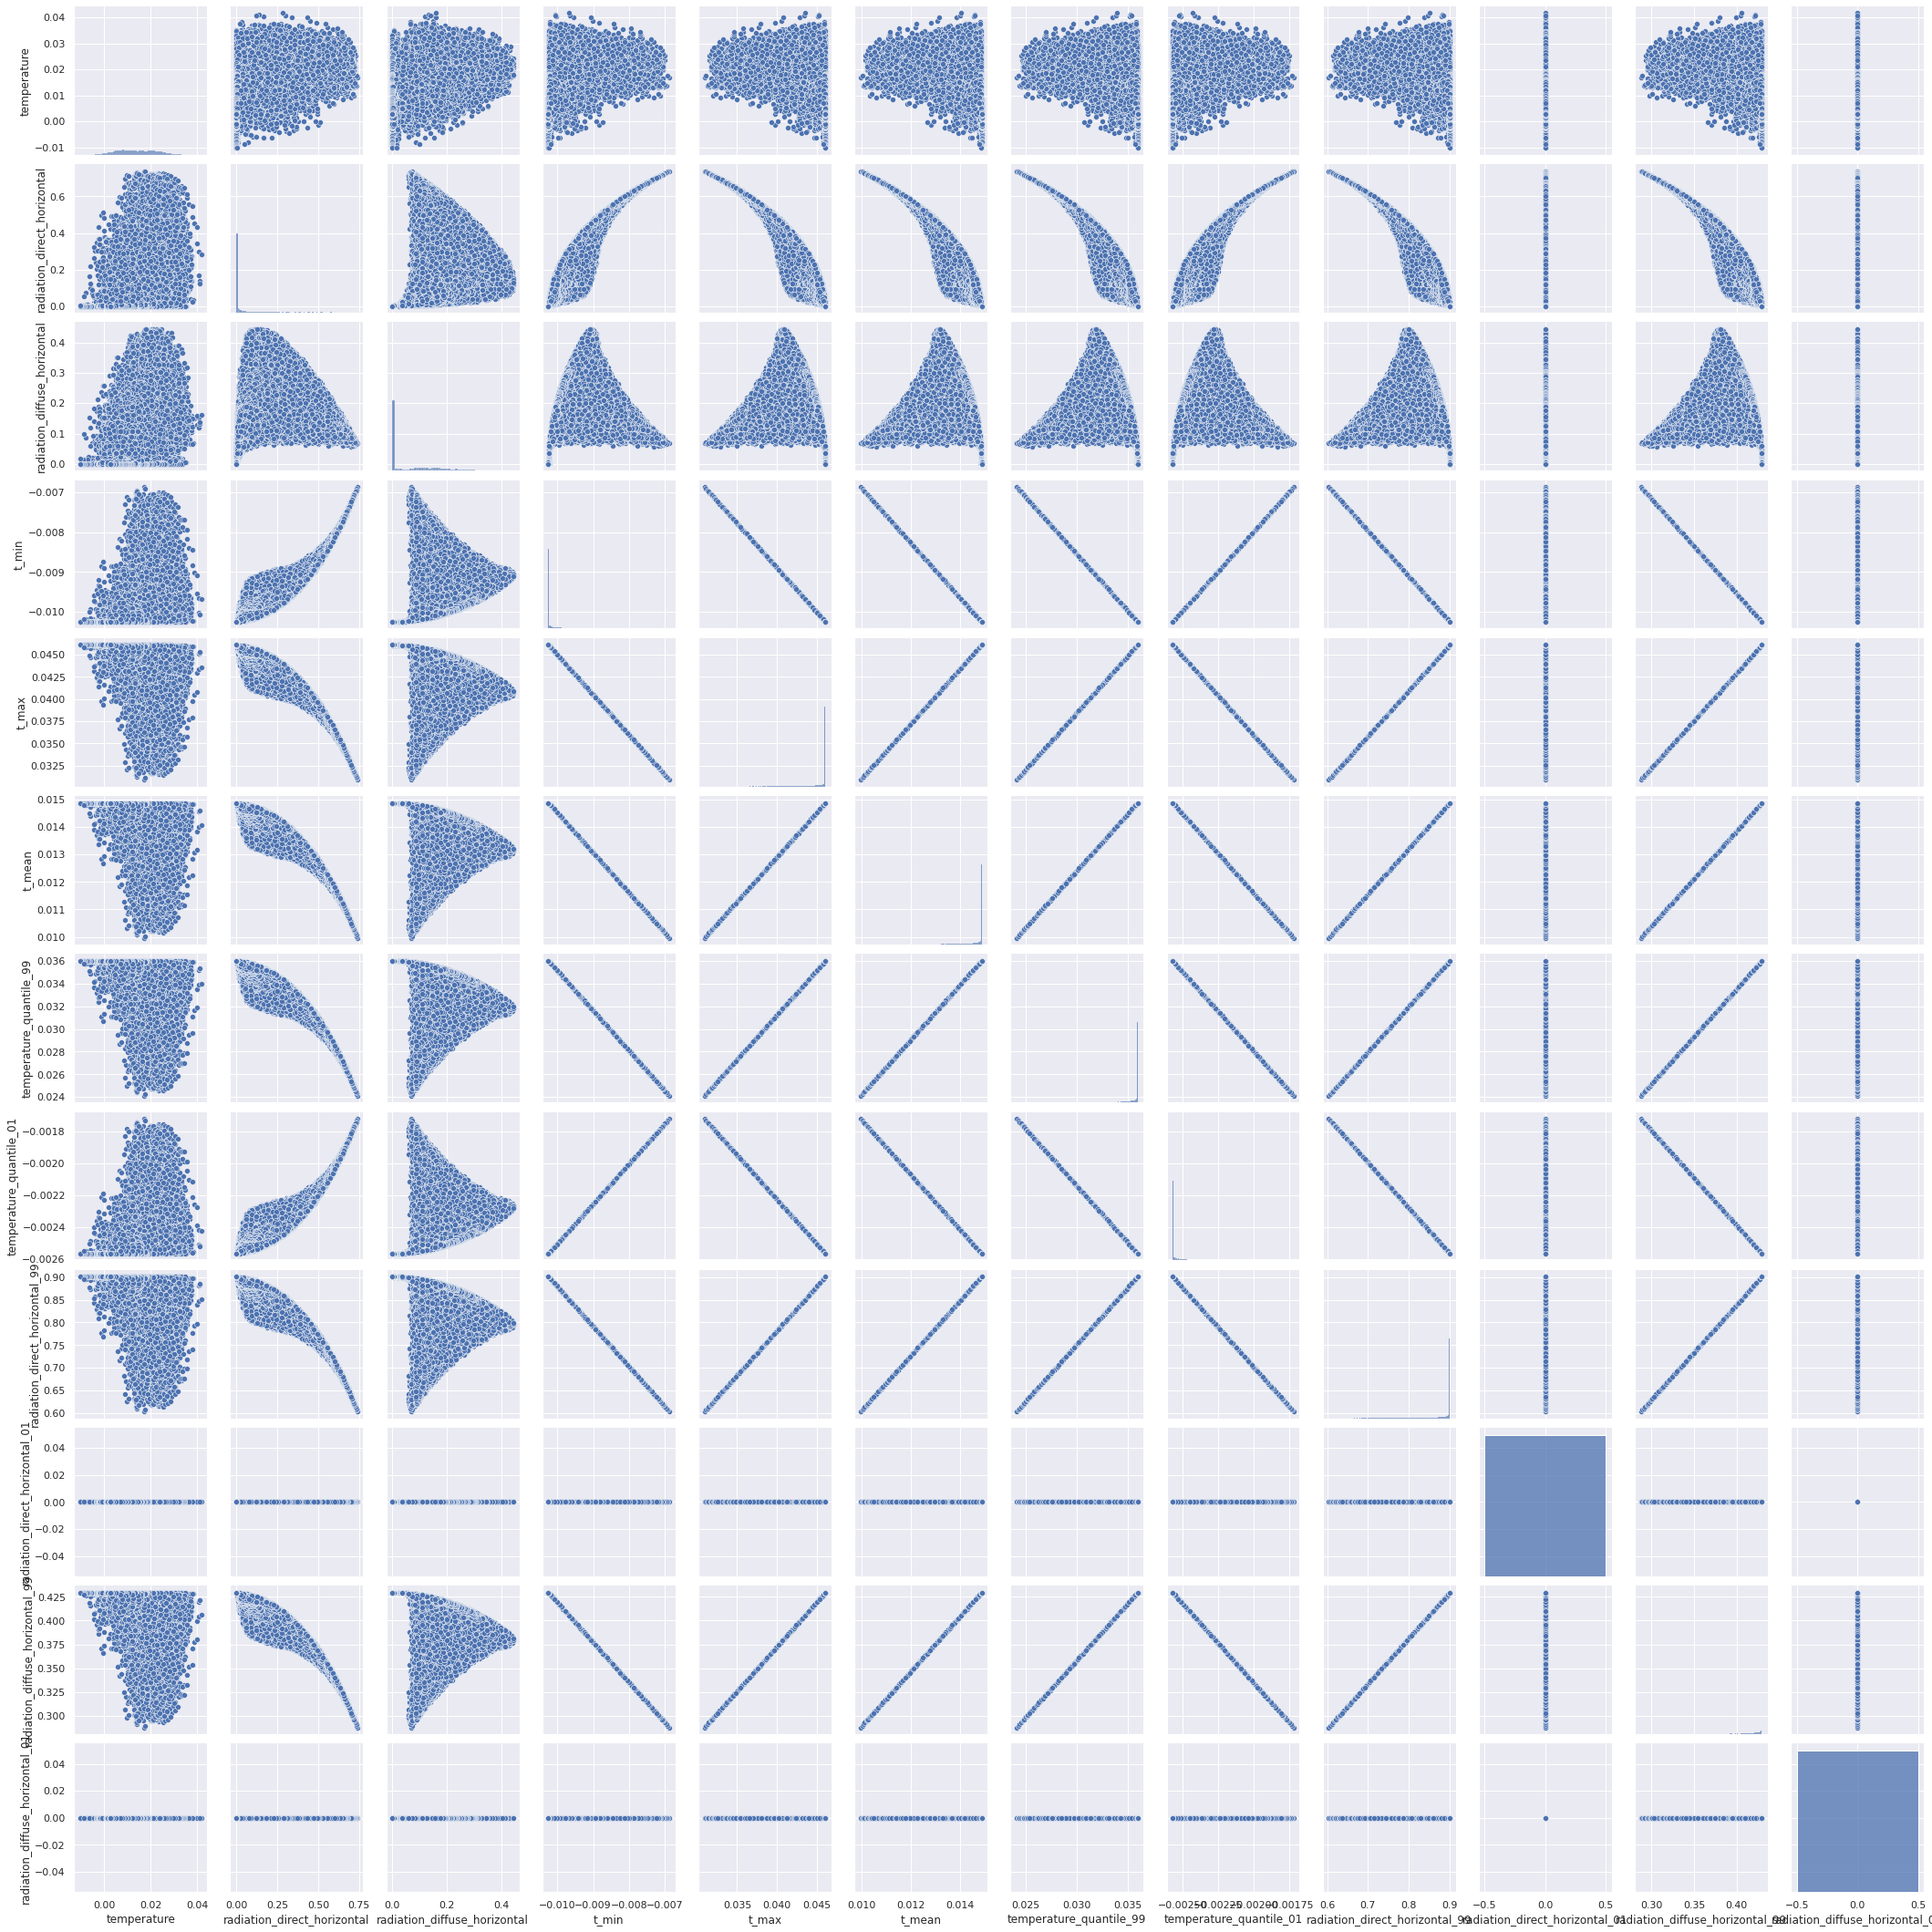

In [ ]:
import seaborn as sns
sns.pairplot(df_scaled2)

<Axes: >

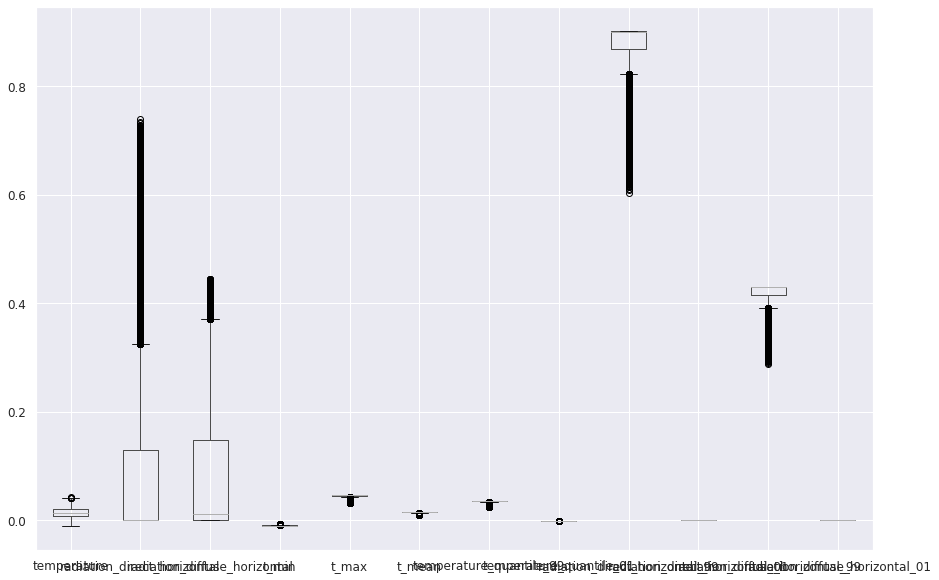

In [ ]:
df_scaled2.boxplot(fontsize=12, figsize=(15, 10))